# Introduction

<font color = 'green'>
Content:
    
 1. [Line Charts](#1)
 2. [Scatter](#2)
 3. [Bar Charts](#3)
 4. [Pie Charts](#4)
 5. [Bubble Charts](#5)
 6. [Histogram](#6)
 7. [Word Cloud](#7)
 8. [Box Plots](#8)
 9. [Scatter Matrix Plots](#9)
 10. [Inset Plots](#10)
 11. [3D Scatter Plot with Colorscaling](#11)
 12. [Multiple Subplots](#12)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [2]:
timesData = pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv')

In [3]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


<a id = "1"></a><br>
## Line Charts

In [5]:
df = timesData.iloc[:100,:]


import plotly.graph_objs as go


trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(166, 12, 2, 0.8)'),
                    text= df.university_name)

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(12, 26, 200, 0.8)'),
                    text= df.university_name)

data = [trace1, trace2]

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 6,zeroline= True)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

<a id = "2"></a><br>
## Scatter

In [6]:
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
df2013 = timesData[timesData.year == 2013].iloc[:100,:]

import plotly.graph_objs as go

trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)

trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)

trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

trace4 =go.Scatter(
                    x=df2013.world_rank,
                    y=df2013.citations,
                    mode="markers",
                    name="2013",
                    marker=dict(color = 'rgb(0,50,200,0.8)'),
                    text= df2013.university_name)


data = [trace4, trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2013, 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
iplot(fig)

<a id = "3"></a><br>
## Bar Charts

In [7]:

df2016 = timesData[timesData.year == 2016].iloc[:3,:]

import plotly.graph_objs as go
 
trace1 = go.Bar(
                x = df2016.university_name,
                y = df2016.citations,
                name = "citations",
                marker = dict(color = 'rgba(172, 208, 192, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2016.country)

trace2 = go.Bar(
                x = df2016.university_name,
                y = df2016.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(192, 228, 241, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2016.country)

data = [trace1, trace2]

layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [8]:

df2016 = timesData[timesData.year == 2016].iloc[:3,:]

import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2016.citations,
  'name': 'citation',
  'type': 'bar'
};

trace2 = {
  'x': x,
  'y': df2016.teaching,
  'name': 'teaching',
  'type': 'bar'
};

data = [trace1, trace2];

layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'citations and teaching of top 3 universities in 2016'
};

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id = "4"></a><br>
## Pie Charts

In [9]:

df2016 = timesData[timesData.year == 2016].iloc[:7,:]

pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students] 
labels = df2016.university_name


fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .7]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": " ",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id = "5"></a><br>
## Bubble Charts

In [10]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]

num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]

iplot(data)

<a id = "6"></a><br>
## Histogram

In [11]:
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2016 = timesData.student_staff_ratio[timesData.year == 2016]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=x2016,
    opacity=0.75,
    name = "2016",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))


data = [trace1, trace2]

layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2016',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id = "7"></a><br>
## Word Cloud

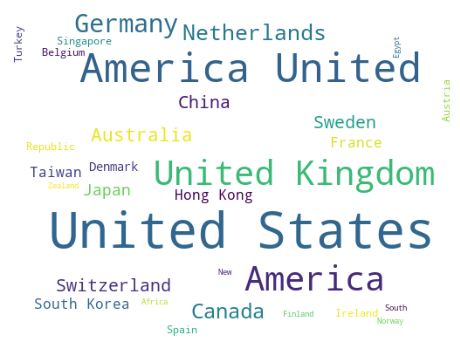

In [12]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))

wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id = "8"></a><br>
## Box Plots

In [13]:
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

<a id = "9"></a><br>
## Scatter Matrix Plots

In [14]:

import plotly.figure_factory as ff

dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]

data2015["index"] = np.arange(1,len(data2015)+1)

fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=800, width=800)
iplot(fig)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



<a id = "10"></a><br>
## Inset Plots

In [15]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)

trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)

data = [trace1, trace2]

layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id = "11"></a><br>
## 3D Scatter Plot with Colorscaling

In [16]:

trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,128,255)',                     
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id = "12"></a><br>
## Multiple Subplots

In [17]:
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)